In [1]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download NLTK dependencies (only needs to be run once)
#nltk.download('stopwords')
#nltk.download('punkt')
#nltk.download('wordnet')

# Load the dataset
df = pd.read_excel('data_news.xlsx')

# Display column names and preview data
print("Dataset Columns:", df.columns)
print(df.head())

# Identify the column that contains text data
text_column = None
for col in df.columns:
    if df[col].dtype == 'object' and df[col].str.len().mean() > 50:  # Assuming large text is present
        text_column = col
        print(f"Detected text column: {text_column}")
        break

# If no column is automatically detected, prompt the user
if not text_column:
    raise ValueError("No text column was automatically detected. Please specify the text column manually.")

# Data Cleaning Function
def clean_text(text):
    text = re.sub(r'[^A-Za-z]', ' ', str(text))  # Remove special characters
    text = text.lower()  # Convert to lowercase
    tokens = word_tokenize(text)  # Tokenize the text
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stopwords.words('english')]
    return ' '.join(tokens)

# Apply cleaning function to the detected text column
df['cleaned_text'] = df[text_column].apply(clean_text)

# Handle missing values
df = df.dropna()

# Check cleaned data
print(df[['cleaned_text']].head())


Dataset Columns: Index(['category', 'headline', 'links', 'short_description', 'keywords'], dtype='object')
   category                                           headline  \
0  WELLNESS              143 Miles in 35 Days: Lessons Learned   
1  WELLNESS       Talking to Yourself: Crazy or Crazy Helpful?   
2  WELLNESS  Crenezumab: Trial Will Gauge Whether Alzheimer...   
3  WELLNESS                     Oh, What a Difference She Made   
4  WELLNESS                                   Green Superfoods   

                                               links  \
0  https://www.huffingtonpost.com/entry/running-l...   
1  https://www.huffingtonpost.com/entry/talking-t...   
2  https://www.huffingtonpost.com/entry/crenezuma...   
3  https://www.huffingtonpost.com/entry/meaningfu...   
4  https://www.huffingtonpost.com/entry/green-sup...   

                                   short_description  \
0  Resting is part of training. I've confirmed wh...   
1  Think of talking to yourself as a tool to co

 Feature Extraction

['abuse' 'according' 'accused' 'act' 'action' 'activist' 'actor' 'actress'
 'actually' 'ad' 'adam' 'adorable' 'adventure' 'advice' 'afghanistan'
 'africa' 'age' 'ahead' 'aid' 'air' 'airline' 'airport' 'al' 'album'
 'aleppo' 'allegation' 'almost' 'already' 'always' 'amazing' 'america'
 'american' 'amid' 'among' 'anniversary' 'another' 'answer' 'anti' 'apple'
 'around' 'arrest' 'arrested' 'art' 'artist' 'asian' 'ask' 'assault'
 'athlete' 'attack' 'australia' 'autism' 'avoid' 'award' 'away' 'awesome'
 'baby' 'back' 'bacon' 'bad' 'bag' 'ball' 'ban' 'bank' 'bar' 'baseball'
 'battle' 'beach' 'beat' 'beautiful' 'beauty' 'beckham' 'become' 'becomes'
 'beer' 'behind' 'ben' 'benefit' 'bernie' 'best' 'better' 'beyonc'
 'beyond' 'big' 'biggest' 'bill' 'billion' 'birth' 'birthday' 'black'
 'block' 'blue' 'board' 'body' 'bomb' 'bombing' 'book' 'border' 'boston'
 'bowl' 'box' 'boy' 'brain' 'brand' 'brazil' 'break' 'breakfast'
 'breaking' 'breast' 'breastfeeding' 'bring' 'british' 'brother' 'brown'
 '

C:\Users\anish\AppData\Local\Temp\ipykernel_15540\2352413206.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')


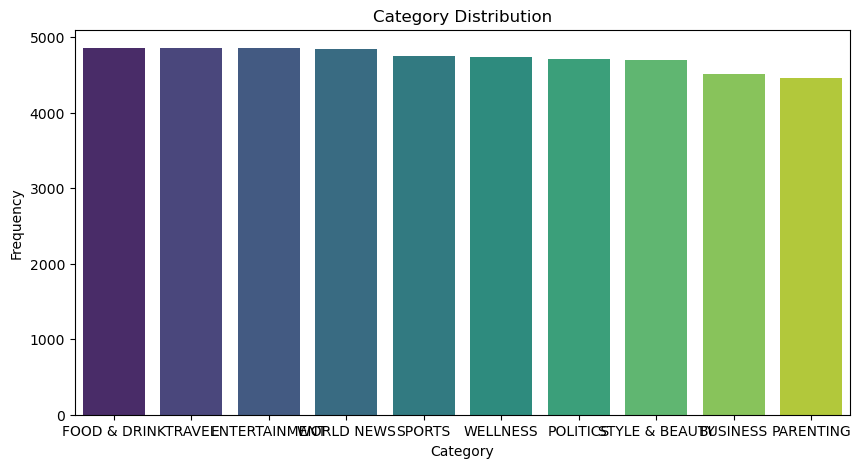

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=1000)
X = tfidf.fit_transform(df['cleaned_text']).toarray()

# Display TF-IDF feature names
print(tfidf.get_feature_names_out())

# Check category distribution
category_counts = df['category'].value_counts()
plt.figure(figsize=(10, 5))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
plt.title('Category Distribution')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()


Model Development and Training


**Logistic Regression** Performance Metrics:
Accuracy: 0.6414
Precision: 0.6518
Recall: 0.6414
F1-Score: 0.6446

Classification Report:
                precision    recall  f1-score   support

      BUSINESS       0.57      0.53      0.55       879
 ENTERTAINMENT       0.57      0.59      0.58       932
  FOOD & DRINK       0.77      0.70      0.73      1025
     PARENTING       0.68      0.64      0.66       865
      POLITICS       0.63      0.60      0.61       950
        SPORTS       0.68      0.70      0.69       925
STYLE & BEAUTY       0.80      0.73      0.76       985
        TRAVEL       0.68      0.63      0.66       961
      WELLNESS       0.44      0.61      0.51       967
    WORLD NEWS       0.69      0.67      0.68       969

      accuracy                           0.64      9458
     macro avg       0.65      0.64      0.64      9458
  weighted avg       0.65      0.64      0.64      9458



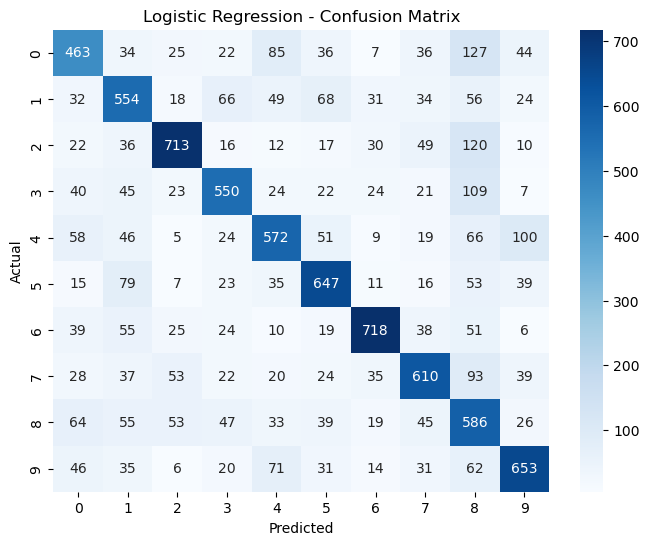


**Naive Bayes** Performance Metrics:
Accuracy: 0.6206
Precision: 0.6273
Recall: 0.6206
F1-Score: 0.6222

Classification Report:
                precision    recall  f1-score   support

      BUSINESS       0.59      0.49      0.54       879
 ENTERTAINMENT       0.44      0.59      0.50       932
  FOOD & DRINK       0.71      0.69      0.70      1025
     PARENTING       0.62      0.63      0.63       865
      POLITICS       0.63      0.60      0.62       950
        SPORTS       0.66      0.68      0.67       925
STYLE & BEAUTY       0.75      0.71      0.73       985
        TRAVEL       0.65      0.63      0.64       961
      WELLNESS       0.54      0.51      0.52       967
    WORLD NEWS       0.66      0.66      0.66       969

      accuracy                           0.62      9458
     macro avg       0.63      0.62      0.62      9458
  weighted avg       0.63      0.62      0.62      9458



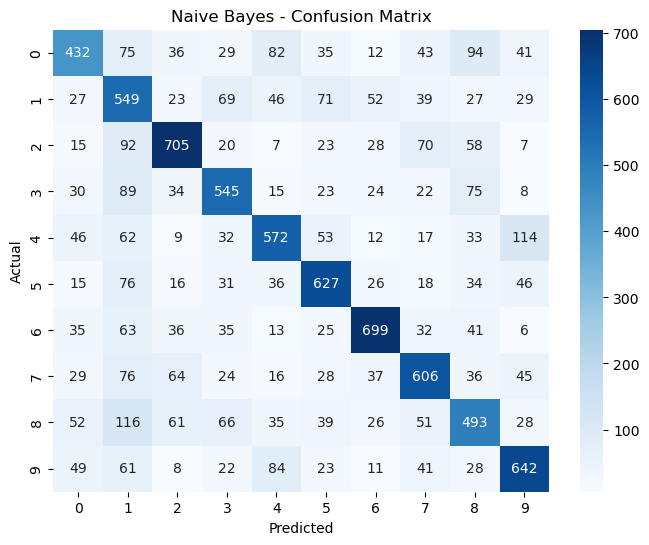


**Support Vector Machine (SVM)** Performance Metrics:
Accuracy: 0.5653
Precision: 0.5907
Recall: 0.5653
F1-Score: 0.5731

Classification Report:
                precision    recall  f1-score   support

      BUSINESS       0.42      0.49      0.45       879
 ENTERTAINMENT       0.49      0.53      0.51       932
  FOOD & DRINK       0.76      0.60      0.67      1025
     PARENTING       0.62      0.57      0.59       865
      POLITICS       0.58      0.58      0.58       950
        SPORTS       0.60      0.59      0.59       925
STYLE & BEAUTY       0.81      0.65      0.73       985
        TRAVEL       0.60      0.53      0.56       961
      WELLNESS       0.36      0.55      0.44       967
    WORLD NEWS       0.65      0.56      0.60       969

      accuracy                           0.57      9458
     macro avg       0.59      0.56      0.57      9458
  weighted avg       0.59      0.57      0.57      9458



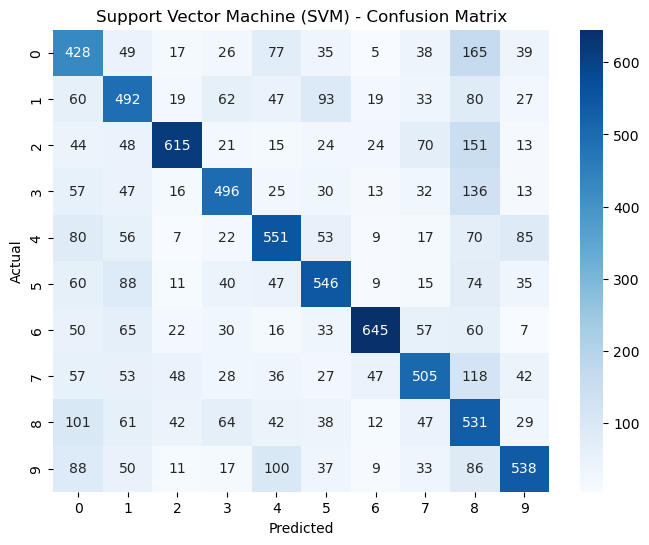

In [3]:
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, df['category'], test_size=0.2, random_state=42)

#  Logistic Regression
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train, y_train)
log_preds = log_model.predict(X_test)

# Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
nb_preds = nb_model.predict(X_test)

#  Support Vector Machine (SVM)
svm_model = SVC(kernel='linear',probability=True) ## Enable probability estimates for AUC
X_train_small = X_train[:5000]  # Use only 5000 samples for training
y_train_small = y_train[:5000]
svm_model.fit(X_train_small, y_train_small)
svm_preds = svm_model.predict(X_test)

# Function to evaluate model performance
def evaluate_model(y_test, y_preds, model_name):
    print(f"\n**{model_name}** Performance Metrics:")
    accuracy = accuracy_score(y_test, y_preds)
    precision = precision_score(y_test, y_preds, average='weighted')
    recall = recall_score(y_test, y_preds, average='weighted')
    f1 = f1_score(y_test, y_preds, average='weighted')
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_preds))
    cm = confusion_matrix(y_test, y_preds)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Evaluate each model
evaluate_model(y_test, log_preds, "Logistic Regression")
evaluate_model(y_test, nb_preds, "Naive Bayes")
evaluate_model(y_test, svm_preds, "Support Vector Machine (SVM)")

Visualizations

C:\Users\anish\AppData\Local\Temp\ipykernel_15540\1101064198.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')


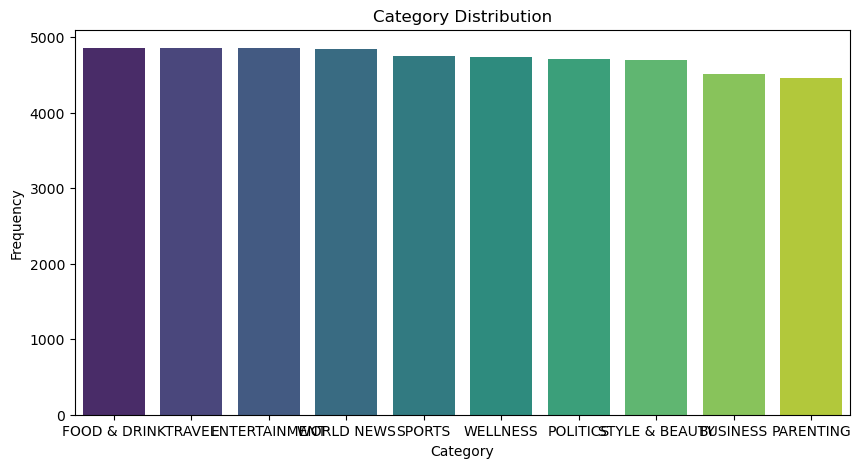

In [4]:
# Bar Chart for Category Distribution
import matplotlib.pyplot as plt
import seaborn as sns

category_counts = df['category'].value_counts()
plt.figure(figsize=(10, 5))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
plt.title('Category Distribution')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()



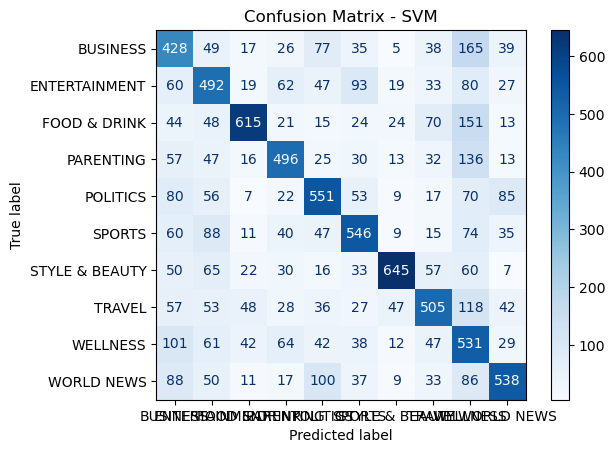

In [5]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, svm_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_model.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix - SVM')
plt.show()


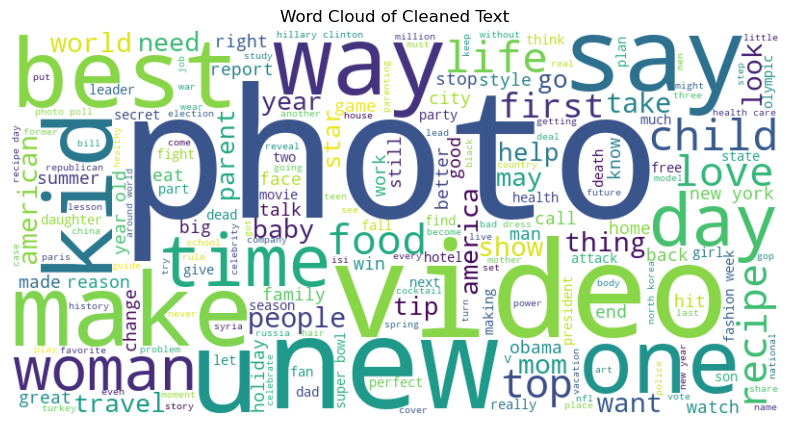

In [6]:
# Word Cloud
 
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['cleaned_text']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Cleaned Text')
plt.show()


Model Training with Hyperparameter Tuning and Cross-Validation

In [7]:
# Logistic Regression with GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l2'],
    'solver': ['liblinear', 'lbfgs']
}

grid_search_log = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search_log.fit(X_train, y_train)

# Best parameters and best score
print(f"Best Hyperparameters for Logistic Regression: {grid_search_log.best_params_}")
print(f"Best Cross-Validated Accuracy: {grid_search_log.best_score_}")

# Evaluate the best model on the test set
best_log_model = grid_search_log.best_estimator_
log_preds = best_log_model.predict(X_test)


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Hyperparameters for Logistic Regression: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Cross-Validated Accuracy: 0.6357652656621728


In [8]:
# Naive Bayes with GridSearchCV
param_grid = {'alpha': [0.01, 0.1, 0.5, 1]}

grid_search_nb = GridSearchCV(MultinomialNB(), param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search_nb.fit(X_train, y_train)

# Best parameters and best score
print(f"Best Hyperparameters for Naive Bayes: {grid_search_nb.best_params_}")
print(f"Best Cross-Validated Accuracy: {grid_search_nb.best_score_}")

# Evaluate the best model on the test set
best_nb_model = grid_search_nb.best_estimator_
nb_preds = best_nb_model.predict(X_test)


Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Hyperparameters for Naive Bayes: {'alpha': 1}
Best Cross-Validated Accuracy: 0.6177372455722971
